# Лекция 1. Подробнее о линейной регрессии

## Содержание
[1.2 Введение](#1.2)  
[1.3 Линейность взаимосвязи](#1.3)   
[1.4 Логарифмическая трансформация переменных](#1.4)  
[1.5 Проблема гетероскедастичности](#1.5)  
[1.6 Мультиколлинеарность. Часть 1](#1.6)  
[1.7 Мультиколлинеарность. Часть 2](#1.7)  
[1.8 Практические задания](#1.8)

## 1.2 Введение<a id='1.2'></a>

**Основные ограничения для метода регрессионного анализа**:  
1) Линейность связи зависимой переменной и независимой переменной ([1.3](#1.3)),  
2) Независимость наблюдений,  
3) Независимость предикторов (проблема мультиколлинеарности) ([1.6](#1.6)),  
4) Гомоскедастичность ([1.5](#1.5)),  
5) Нормальное распределение остатков ([1.4](#1.4)),  
6) Отсутствие автокорреляции остатков.  

## 1.3 Линейность взаимосвязи<a id='1.3'></a>

### Основные понятия и тезисы:  
Если данные ведут себя нелинейно:  
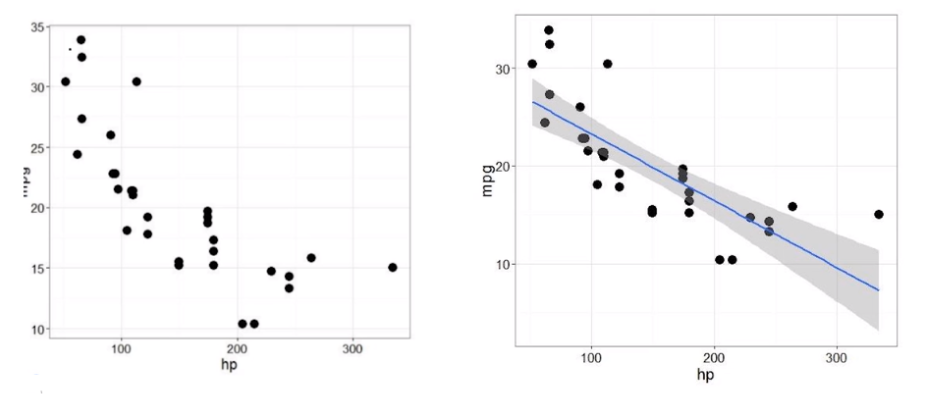  
Есть возможность преобразовать данные(ЗП или НП):  
* **Трансформация Тьюки** - преобразование ЗП(y), НП(x), или обе переменные, путем возведения в степень.  
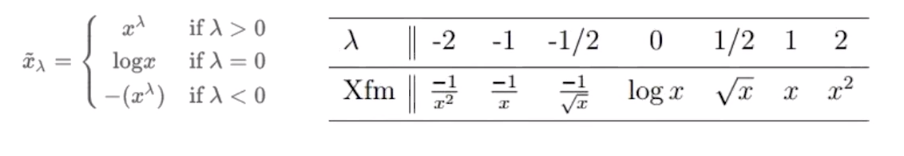  
При использовании отрицательного показателя степени берется получившаяся переменная с обратным знаком, чтобы избежать изменения направления исходной взаимосвязи.  

### Примеры:

In [1]:
library(ggplot2)

data(mtcars)

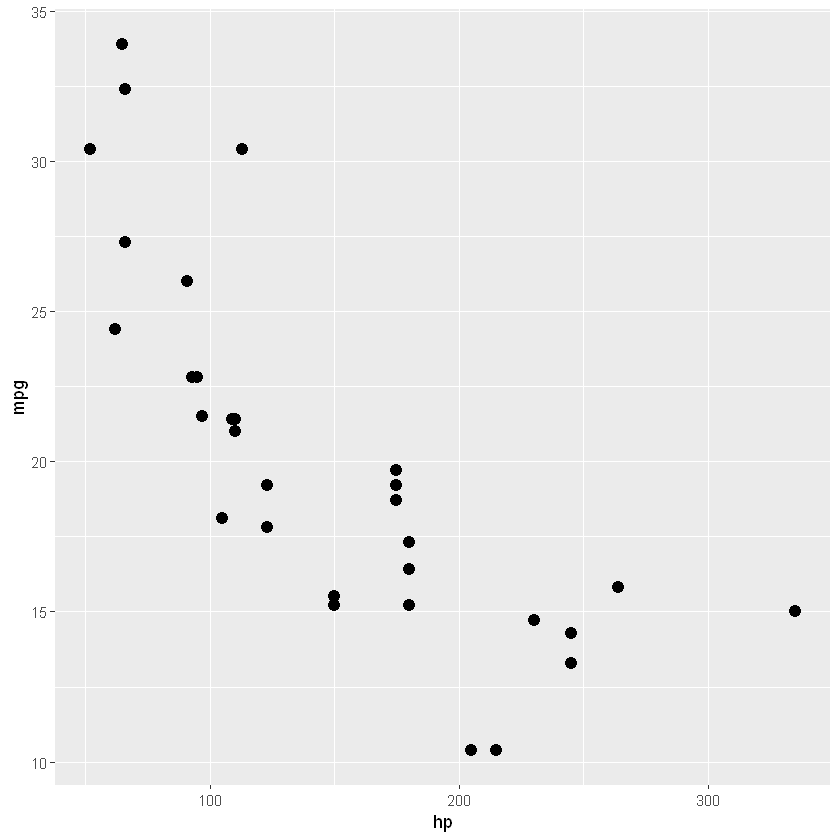

In [2]:
# Исходная зависимость
ggplot(mtcars, aes(x = hp, y = mpg)) + geom_point(size = 3)

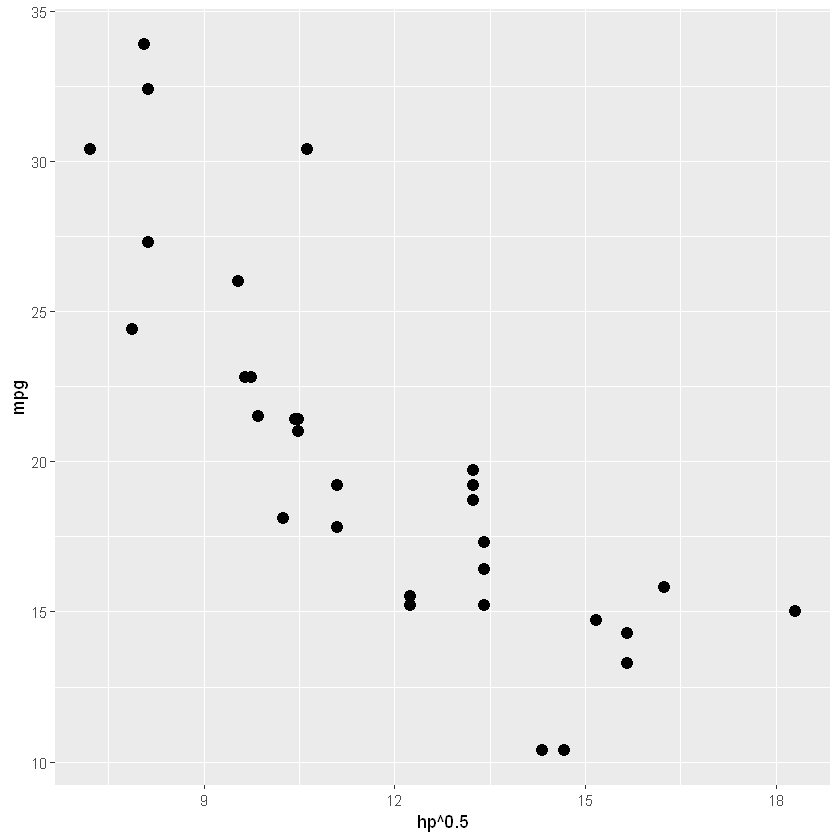

In [3]:
# взятие x в корень - взаимосвязь стала более линейной
ggplot(mtcars, aes(x = hp^0.5, y = mpg)) + geom_point(size = 3)

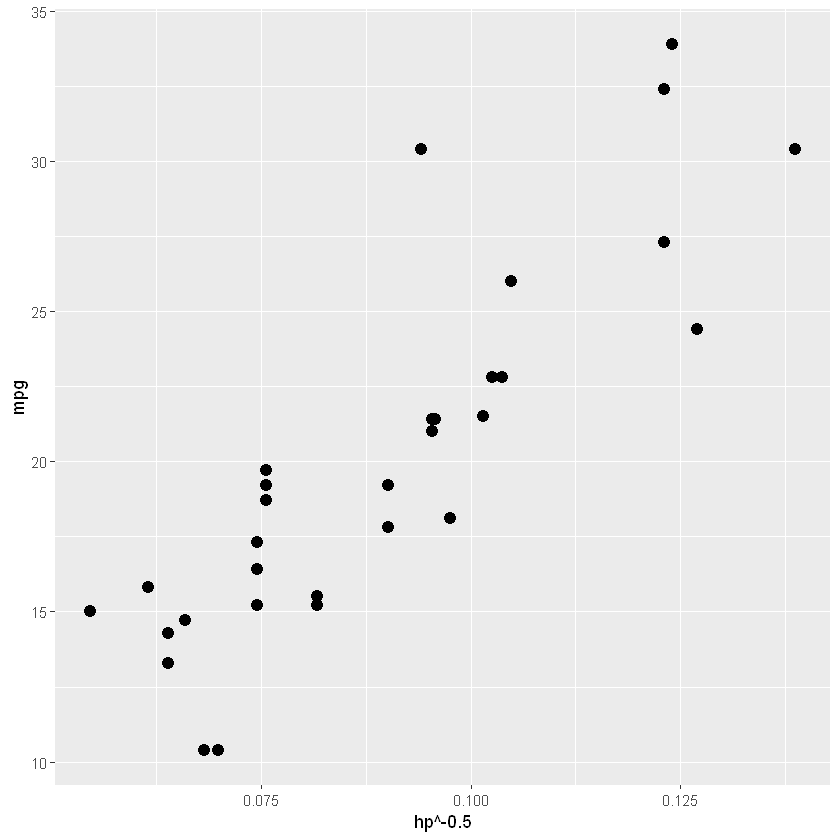

In [4]:
# возведение x в степень -1/2 - изменяется направление взаимосвязи
ggplot(mtcars, aes(x = hp^-0.5, y = mpg)) + geom_point(size = 3)

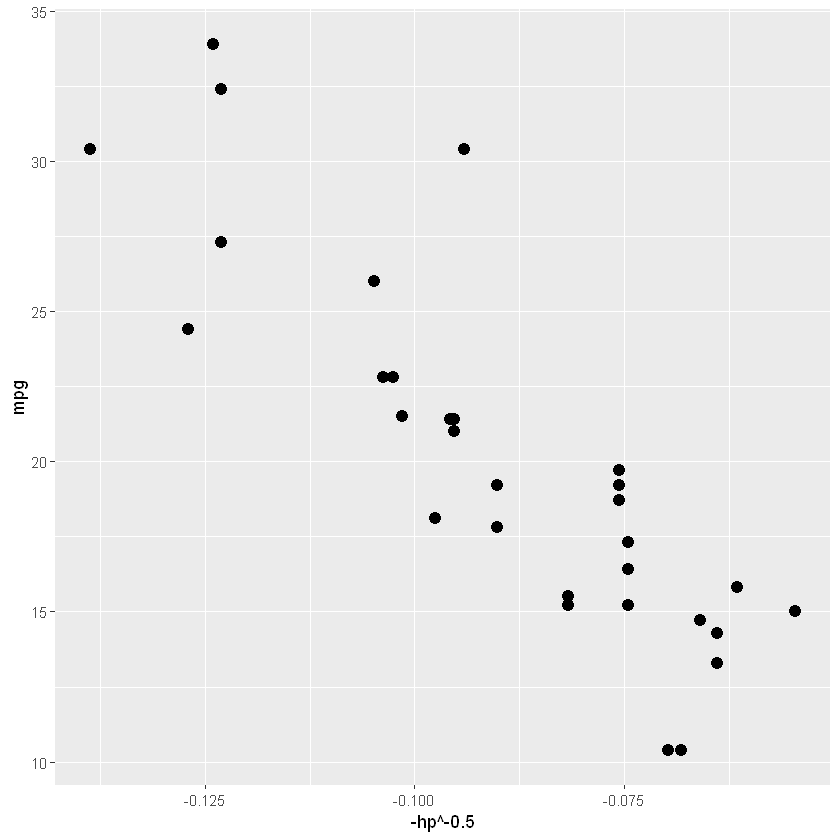

In [5]:
# -x - направление взаимосвязи восстанавливается
ggplot(mtcars, aes(x = -hp^-0.5, y = mpg)) + geom_point(size = 3)

[1] -0.7

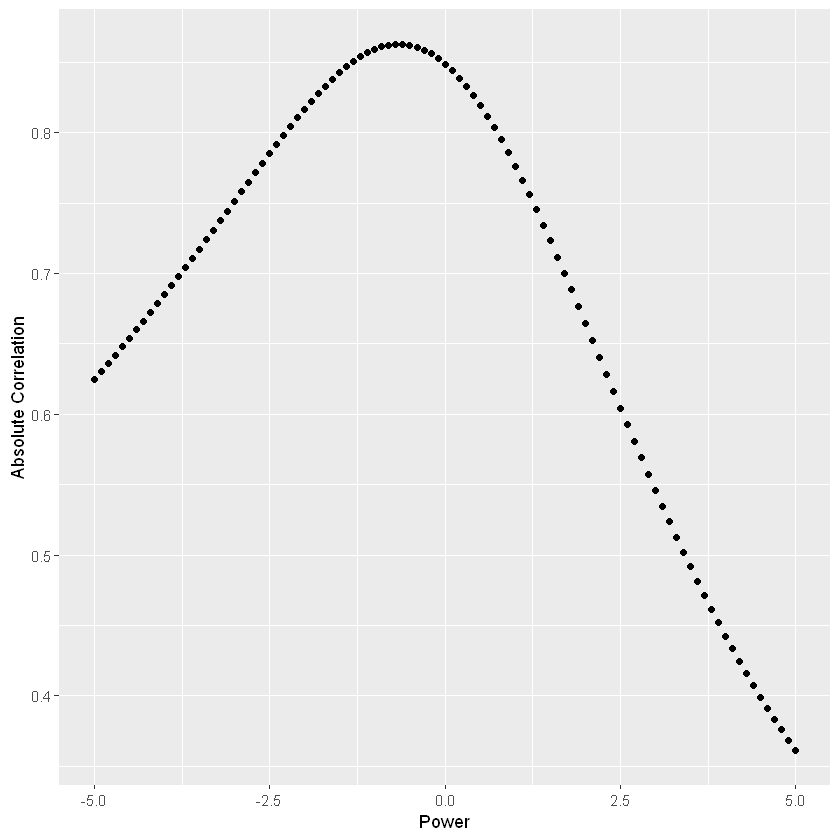

In [10]:
# Взаимосвязь между абсолютным значением корреляции и степенью в которую был возведен x
r <- c()
p <- seq(-5, 5, by = 0.1)

for (i in p){
    if (i != 0) {
        r <- append(r, abs(cor.test(x = mtcars$hp^i, y = mtcars$mpg)$es))
    } else {
        r <- append(r, abs(cor.test(x = log(mtcars$hp), y = mtcars$mpg)$es))  
    }
}

ggplot(data = data.frame(p = p, r = r), aes(x = p, y = r)) +
  geom_point() +
  xlab("Power") +
  ylab("Absolute Correlation")

p[which.max(r)] # максимальное значение корреляции = -0.7

Трансформация переменных - хорошее решение, если мы хотим добиться линейной взаимосвязи между переменными. Индикатором нелинейной взаимосвязи между переменными может служить **ненормальное** распределение остатков регрессии. При помощи трансформации Тьюки мы подбираем такой показатель степени, при котором **абсолютное значение корреляции** между переменными X и Y будет **максимальным**.


## 1.4 Логарифмическая трансформация переменных<a id='1.4'></a>

### Основные понятия и тезисы:   
Трансфомация Тьюки хорошо подходит для решения задач предсказания.  
Для решения задачи проверки гипотез взаимосвязи и выявления природы взаимосвязи подходит плохо, т.к. сложно интерпертировать результаты после преобразования данных.  

Проблему интерпретации помогает решить **логарифмическая трансформация**.  
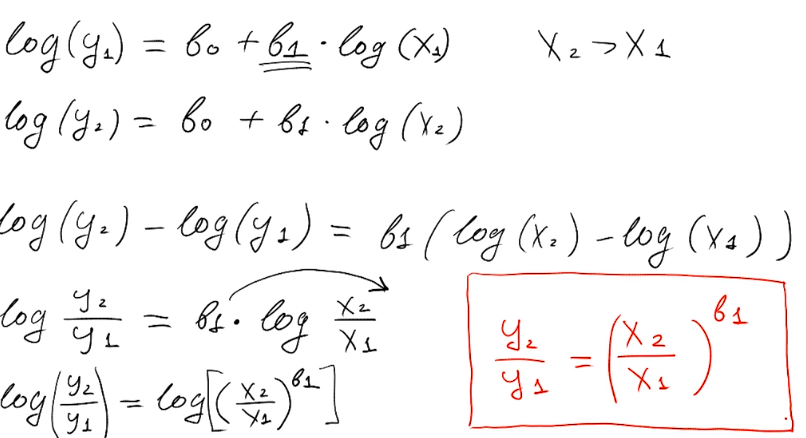  
Коэффициент B1 показывает, насколько % увеличится значение ЗП(y) при условии, что НП(x) увеличится на 1%.  

В модели **log(Y)=b1∗X+b0** - коэффициент наклона b1 означает:  
при единичном изменении переменной X, переменная Y в среднем изменяется на **100∗b1** процентов.  

В модели **Y=b1∗log(X)+b0** коэффициент наклона b1 означает:  
изменение на 1% по X в среднем приводит к **0.01∗b1** изменению по переменной Y.

*Примечание: справедливо в случае малого приращения переменной:*  
* *при увеличении X на единицу переменная Y в среднем изменится на 100 * (e^(b1) − 1) процентов. Выражение 100 ∗ b1 можно рассматривать лишь как линейное приближение точного выражения при значениях b1, близких к нулю.*  
* *Точно так же в модели log(Y) = b1 ∗ log(X) + b0 при увеличении X на 1% переменная Y в действительности изменится на 100 * ((101 / 100)^(b1) - 1) процентов, что мало отличается от b1 только при b1, близких к нулю. Например, уже при b1 = 100 приращение Y составит не 100%, а около 170%. С увеличением b1 по модулю расхождение между указанными выражениями будет возрастать неограниченно.*  
  
**Если несколько предикторов** - то для каждого предиктора подбираются свои степени трансформации с наиболее большим значением корреляции(для задач предсказания). Либо производится логарифмическая трансформация(для интерпретации).  

**Трансформация Бокса — Кокса (Box-Cox transformation)** — широко используемый метод трансформации данных. В контексте регрессии он обычно используется для трансформации зависимой переменной в случае, если у нас есть ненормальное распределение ошибок и/или нелинейность взаимосвязи, а также в случае гетероскедастичности.  
**Идея трансформации**:  
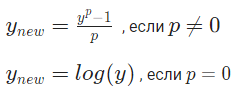  
Параметр p подбирается по схожей идее: используется то p, при котором качество модели максимально (обычно используется [метод максимального правдоподобия](https://ru.wikipedia.org/wiki/Метод_максимального_правдоподобия)). Например, в случае множественной регрессии можно трансформировать зависимую переменную, чтобы добиться более высокого качества модели и выполнения требования к данным.

### Примеры:

In [ ]:
library(ggplot2)

data(mtcars)

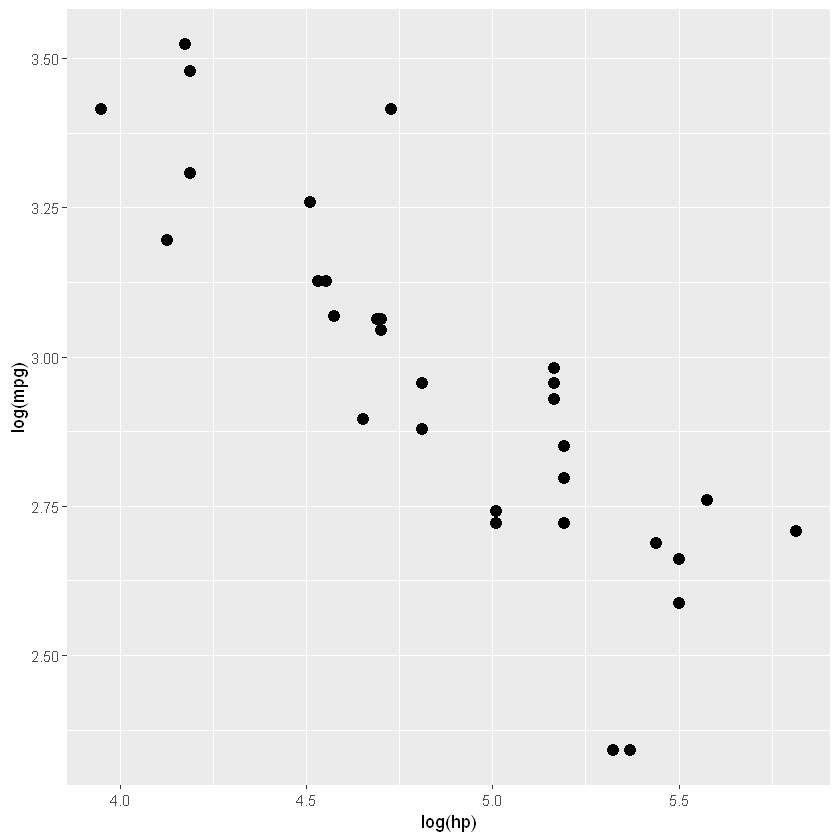

In [11]:
# Применение натурального логарифма к ЗП и НП - взаимосвязь стала более линейной
ggplot(mtcars, aes(x = log(hp), y = log(mpg))) + geom_point(size = 3)

In [14]:
# Интерпертация логарифмической трансформации
fit <- lm(log(mpg) ~ log(hp), mtcars)
summary(fit)

# log(hp)/Estimate = -0.53009 - в среднем, при единичном изменении показателя log(hp), 
# значение log(mpg) будет изменяться на -0.53009
# или
# в среднем, при изменении показателя hp на 1%, значение mpg будет изменяться на -0.53%


Call:
lm(formula = log(mpg) ~ log(hp), data = mtcars)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.38189 -0.05707 -0.00691  0.10815  0.37501 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.54538    0.29913  18.538  < 2e-16 ***
log(hp)     -0.53009    0.06099  -8.691 1.08e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1614 on 30 degrees of freedom
Multiple R-squared:  0.7157,	Adjusted R-squared:  0.7062 
F-statistic: 75.53 on 1 and 30 DF,  p-value: 1.08e-09


In [16]:
# В исследовании проверялась гипотеза о взаимосвязи мотивации студентов 
# и денежного вознаграждения за проделанную работу. 
# Исходные переменные оказались взаимосвязанными нелинейно, 
# поэтому независимая переменная — денежное вознаграждение — была прологарифмирована 
# (использовался натуральный логарифм).  
# В результате была получена следующая модель: мотивация = 120 ∗ log(вознаграждение) + 3

# Укажите, на сколько единиц в среднем увеличивается мотивация при увеличении вознаграждения на 10 процентов.  
# В ответе укажите целое число и не забывайте о правилах округления.

motivation1 = 120 * log(1) + 3
motivation2 = 120 * log(1.1) + 3 # x2/x1 = 1.1

round(motivation2 - motivation1)

[1] 11


	Shapiro-Wilk normality test

data:  fit$residuals
W = 0.92337, p-value = 0.02568


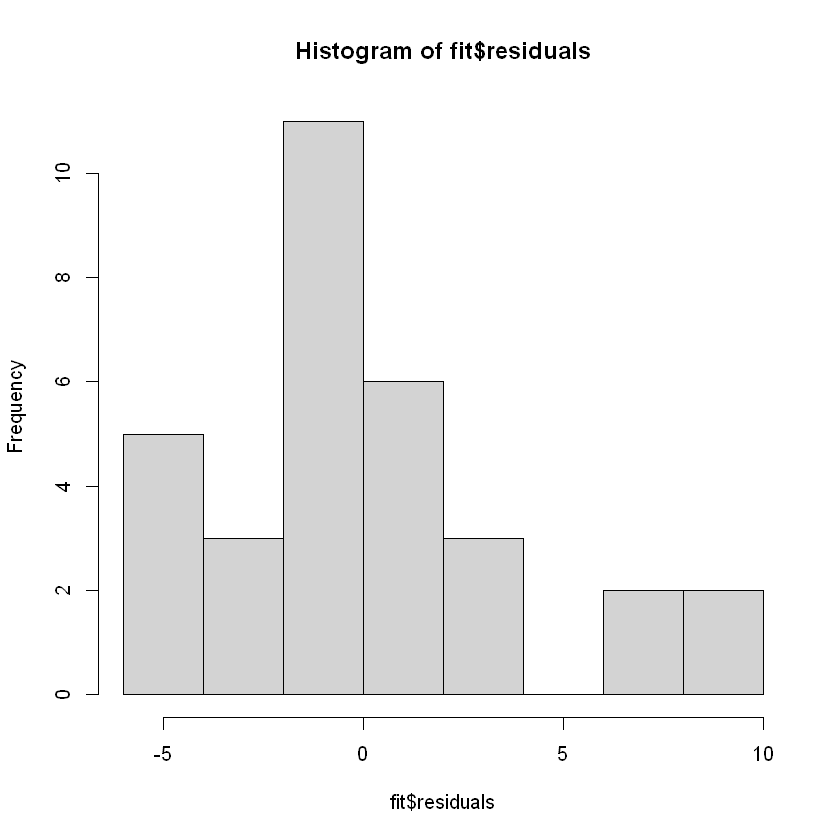

In [20]:
# Распределение остатков у модели без трансформации
fit <- lm(mpg ~ hp, mtcars) 
hist(fit$residuals)
shapiro.test(fit$residuals)
# p < 0.05 - остатки распределены не нормально


	Shapiro-Wilk normality test

data:  fit2$residuals
W = 0.94555, p-value = 0.1077


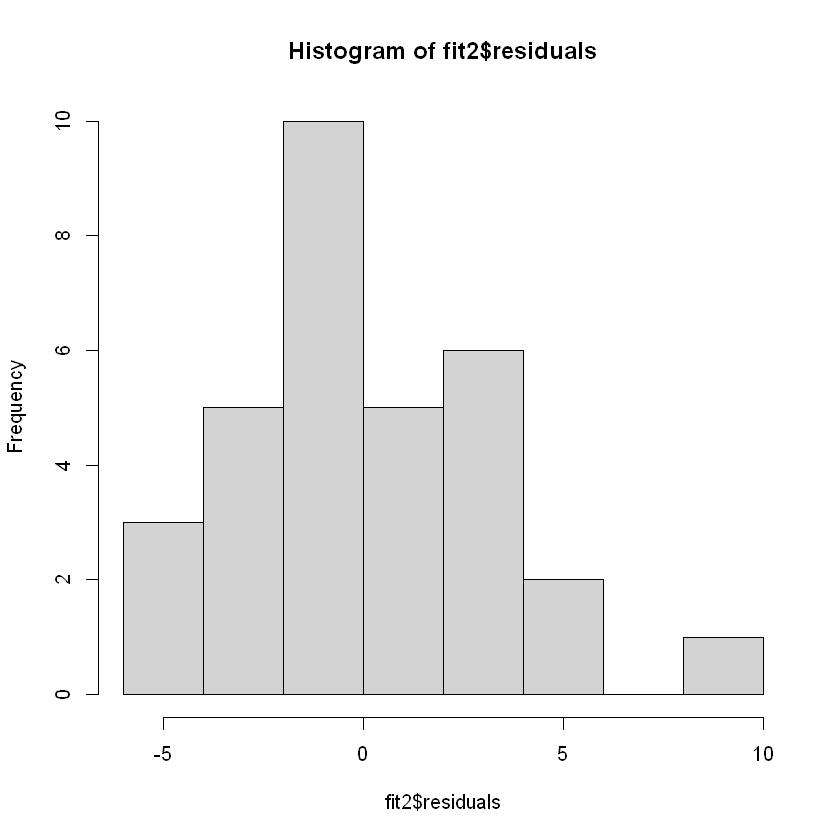

In [21]:
# Распределение остатков у модели с трансформацией
fit2 <- lm(mpg ~ I(-hp^-0.7), mtcars) 
hist(fit2$residuals)
shapiro.test(fit2$residuals)
# p > 0.05 - остатки распределены нормально


	Shapiro-Wilk normality test

data:  fit3$residuals
W = 0.96606, p-value = 0.3982


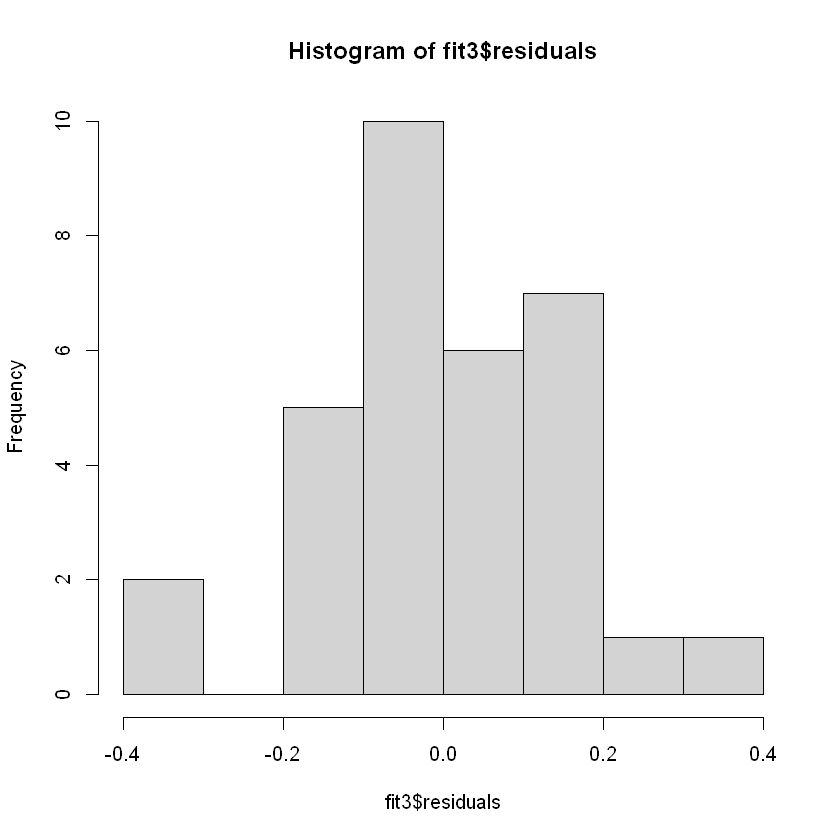

In [22]:
# Распределение остатков у модели с логарифмической трансформацией
fit3 <- lm(log(mpg) ~ log(hp), mtcars) 
hist(fit3$residuals)
shapiro.test(fit3$residuals)
# p > 0.05 - остатки распределены нормально

## 1.5 Проблема гетероскедастичности<a id='1.5'></a>

### Основные понятия и тезисы:   

**Гетероскедастичность** - непостоянная изменчивость остатков на всех уровнях независимой переменной. При гетероскедастичности, нарушается эффективность вычислений модели, также влияет на интерпретацию данных.  

Если построить регрессию, где зависимой переменной будет квадрат остатков модели y ~ x, а независимой переменной будет предиктор x, и в этой модели окажется высокий и значимый R квадрат, это означает, что в данных есть гетероскедастичность.  

Для проверки на гетероскедастичность остатков используются тесты:  
* **Тест Уайта** - используется для выявления гетероскедастичности в регрессионной модели. Если статистика теста Уайта значима, то это означает, что дисперсия члена ошибки не является постоянной по всем наблюдениям, что указывает на наличие гетероскедастичности в регрессионной модели.  

* **Тест Бройша — Пагана** — один из статистических тестов для проверки наличия гетероскедастичности случайных ошибок регрессионной модели. Применяется, если есть основания полагать, что дисперсия случайных ошибок может зависеть от некоторой совокупности переменных. При этом в данном тесте проверяется линейная зависимость дисперсии случайных ошибок от некоторого набора переменных.  



### Примеры:

In [2]:
library(ggplot2)
# install.packages("dplyr")
library(dplyr) # для использования sample_n
# install.packages("lmtest")
library(lmtest) # для теста Бройша-Пагана

set.seed(42)
diamonds_2 <- sample_n(diamonds, 500) # случайная выборка из 500 наблюдений
head(diamonds_2)

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.39,Ideal,I,VVS2,60.8,56,849,4.74,4.76,2.89
1.12,Very Good,G,SI2,63.3,58,4478,6.70,6.63,4.22
0.51,Very Good,G,VVS2,62.9,57,1750,5.06,5.12,3.20
0.52,Very Good,D,VS1,62.5,57,1829,5.11,5.16,3.21
0.28,Very Good,E,VVS2,61.4,55,612,4.22,4.25,2.60
1.01,Fair,F,SI1,67.2,60,4276,6.06,6.00,4.05


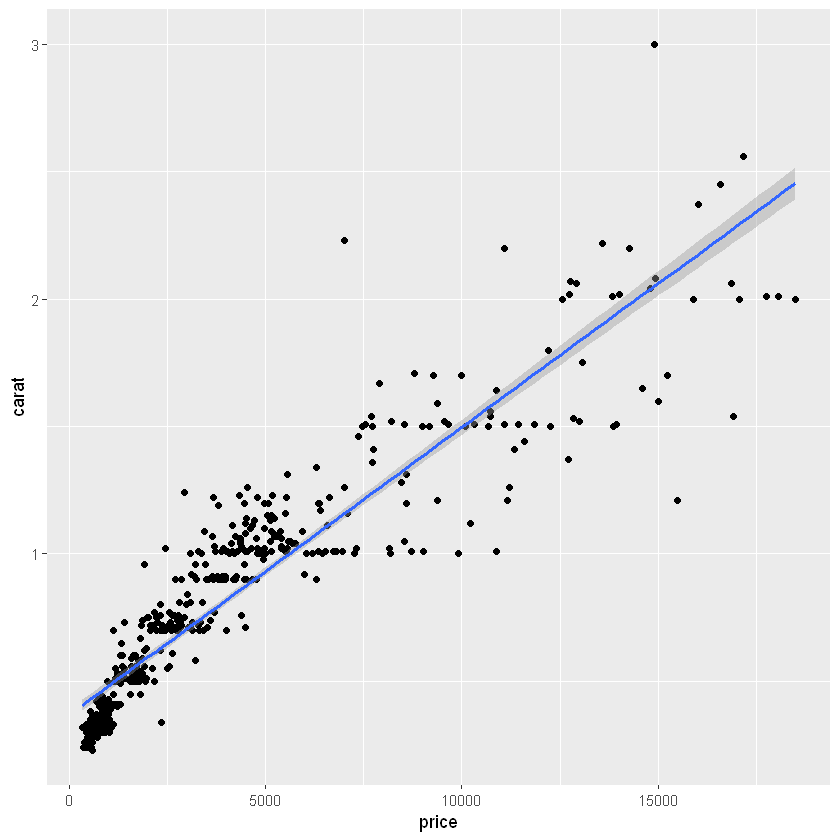

In [3]:
# В случае данных с 2 переменными, гетероскедастичность легко выявляется через scatterplot.   
ggplot(data = diamonds_2, aes(x = price, y = carat)) +
  geom_point() + 
  geom_smooth(formula = y ~ x, method = "lm")

# нелинейная взаимосвязь переменных
# проблема гетероскедастичности(в левой части графика наблюдения находятся гораздо ближе к прямой чем в правой части)

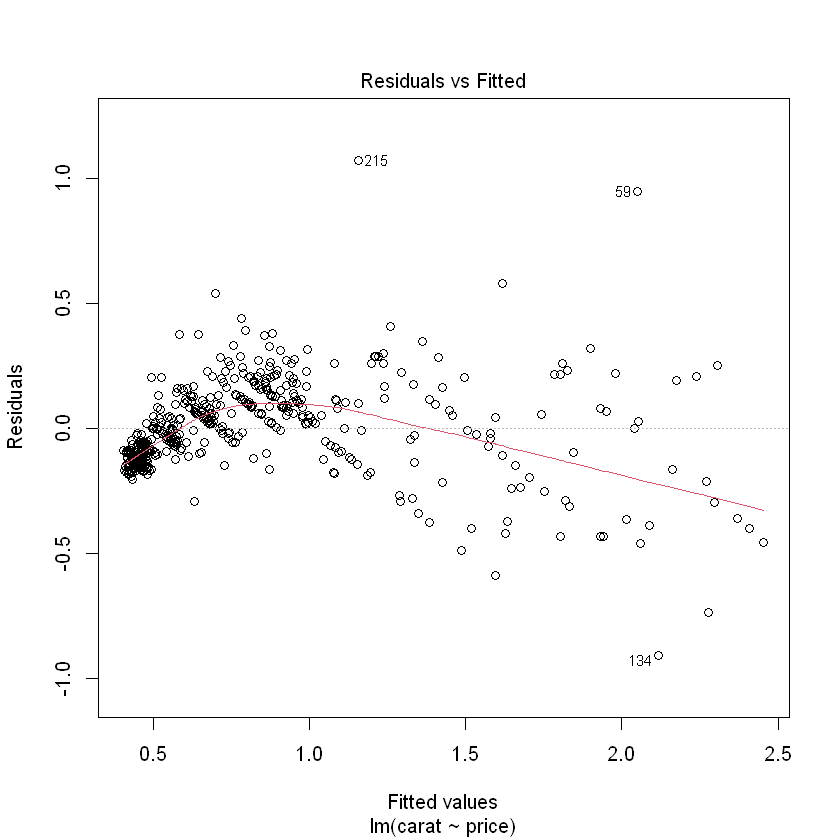

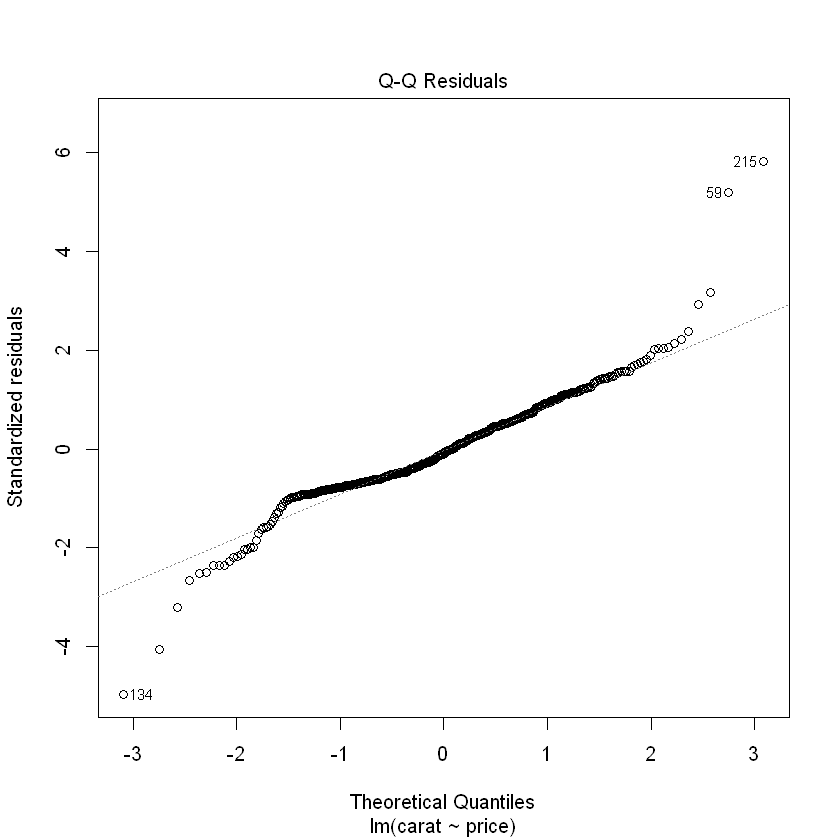

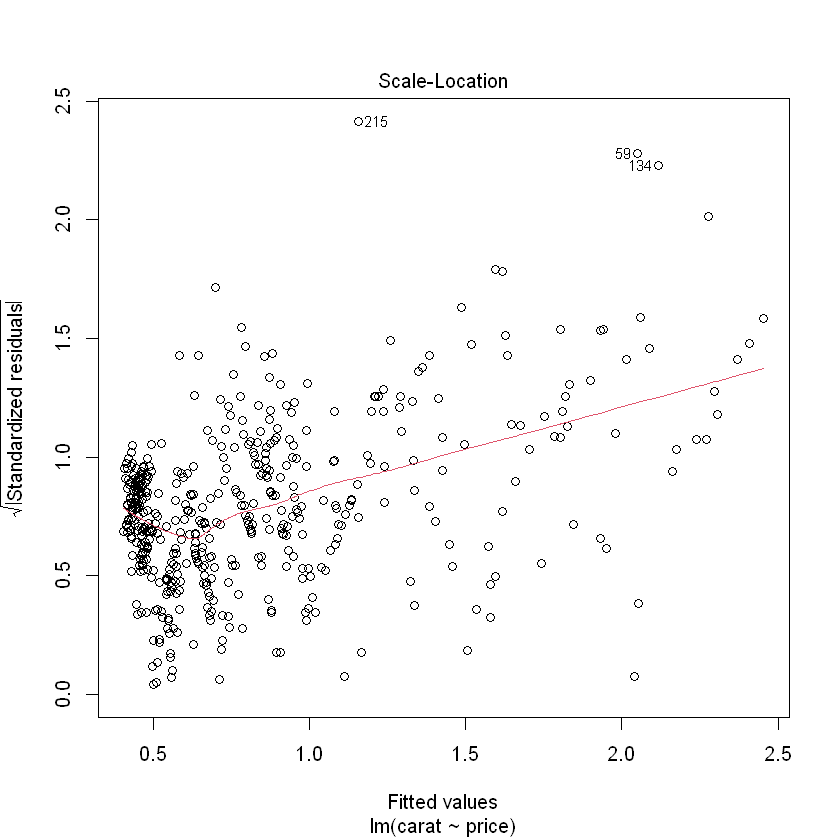

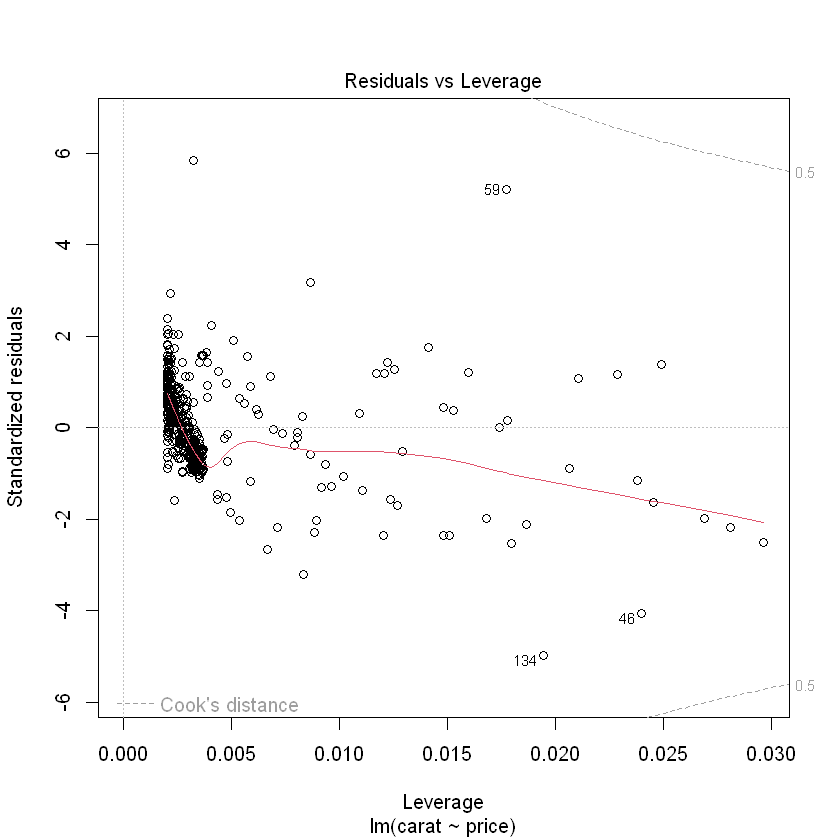

In [4]:
# В случае, если в данных больше 1 предиктора, рисуются остатки модели на разных уровнях предсказанных значений.  
fit_1 <- lm(carat ~ price, diamonds_2)
plot(fit_1)

In [5]:
summary(fit_1)
# Adjusted R-squared:  0.8521


Call:
lm(formula = carat ~ price, data = diamonds_2)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.90651 -0.11383 -0.01631  0.10611  1.07188 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3.674e-01  1.170e-02   31.39   <2e-16 ***
price       1.129e-04  2.105e-06   53.62   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1841 on 498 degrees of freedom
Multiple R-squared:  0.8524,	Adjusted R-squared:  0.8521 
F-statistic:  2875 on 1 and 498 DF,  p-value: < 2.2e-16


In [6]:
# тест Бройша-Пагана
bptest(fit_1)

# p-value < 0.05 - в данных есть гетероскедастичность


	studentized Breusch-Pagan test

data:  fit_1
BP = 78.422, df = 1, p-value < 2.2e-16


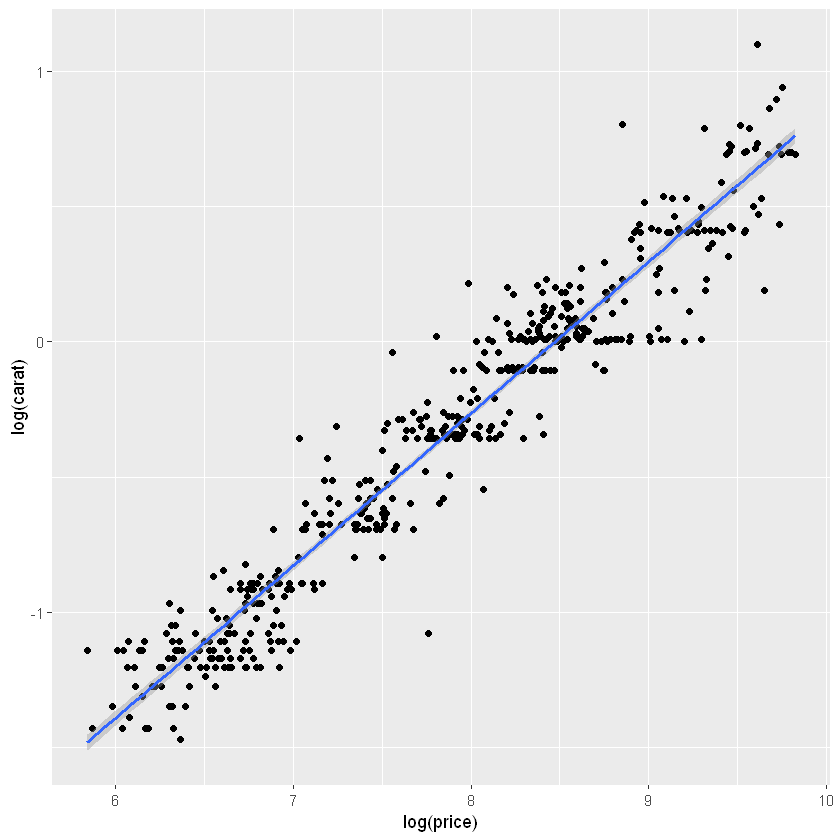

In [7]:
# данные с логарифмической трансформацией
ggplot(data = diamonds_2, aes(x = log(price), y = log(carat))) +
  geom_point() + 
  geom_smooth(formula = y ~ x, method = "lm")

# видно что остатки лежат равномерно

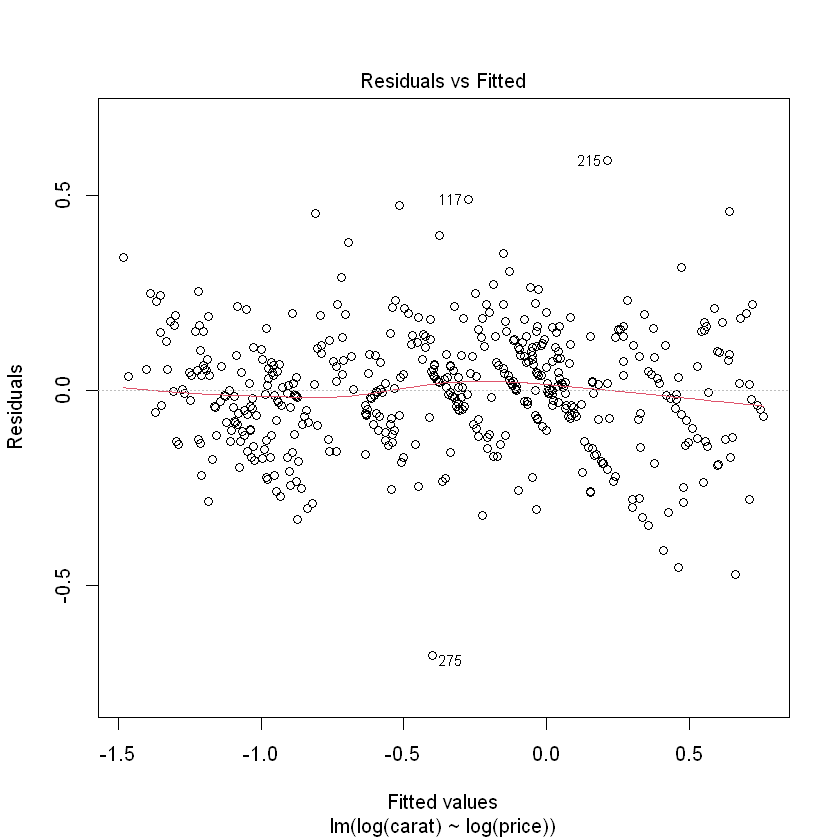

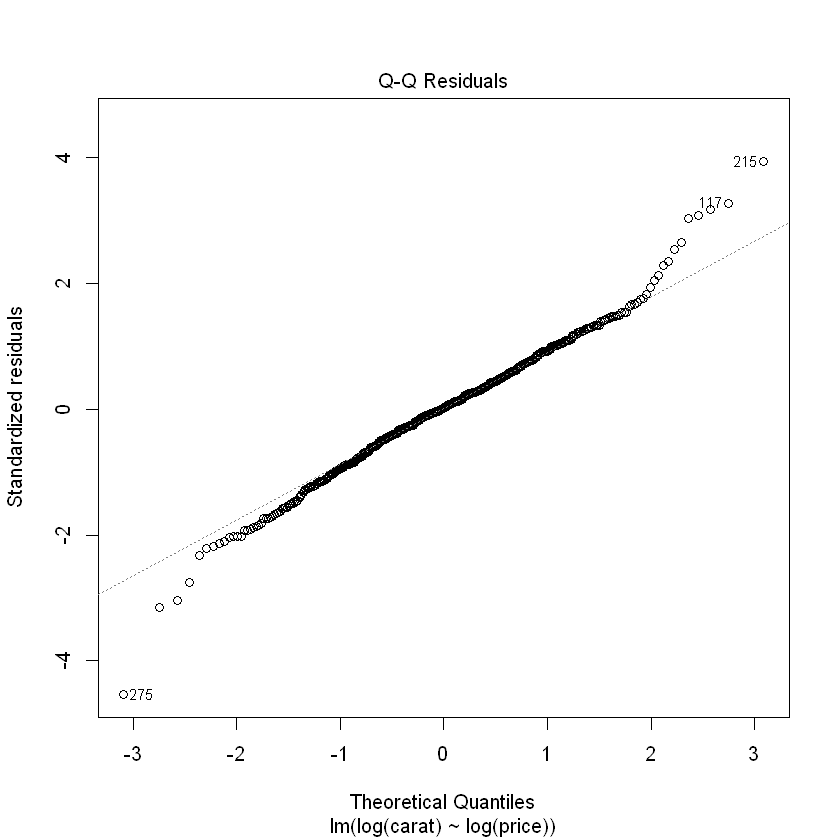

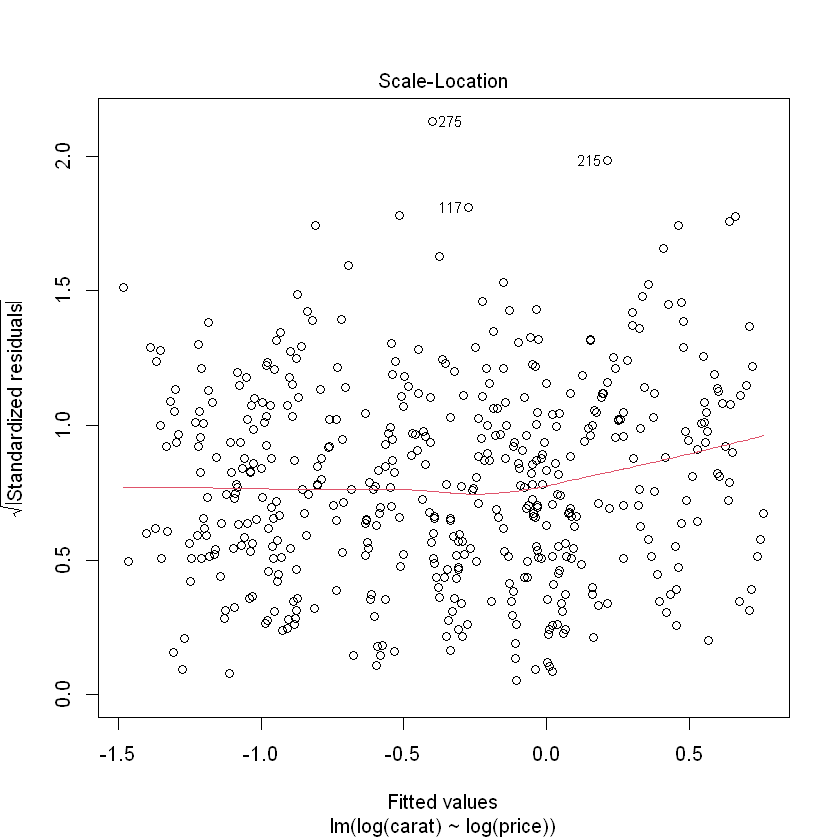

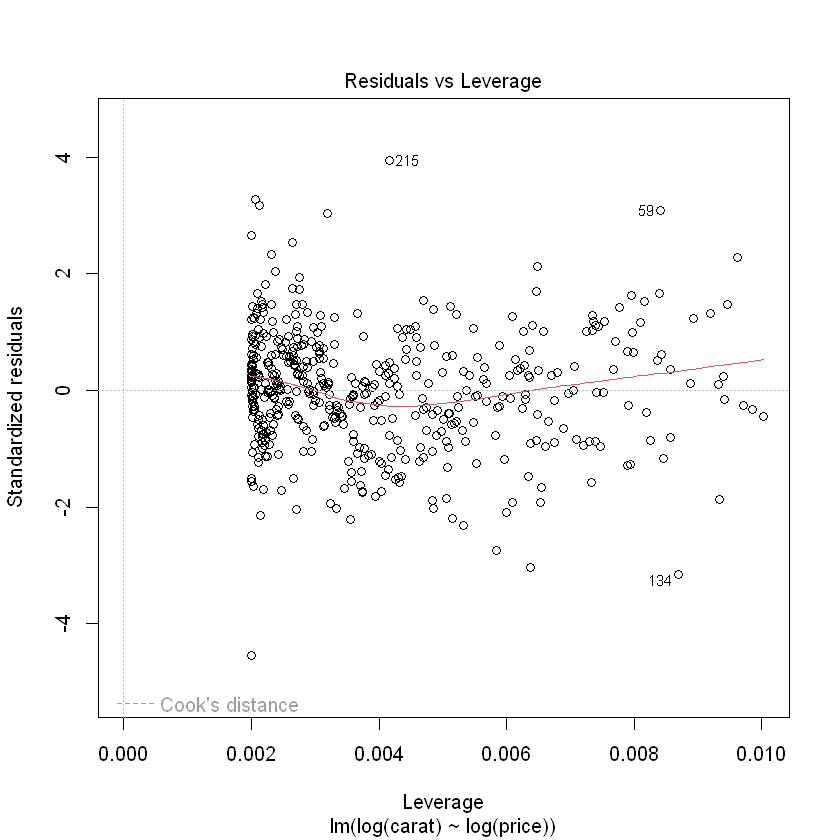

In [8]:
fit_2 <- lm(log(carat) ~ log(price), diamonds_2)
plot(fit_2)

In [9]:
bptest(fit_2)
# p > 0.05 - данные гомоскедастичны


	studentized Breusch-Pagan test

data:  fit_2
BP = 5.1348, df = 1, p-value = 0.02345


In [10]:
summary(fit_2)
# Adjusted R-squared больше чем у fit_1


Call:
lm(formula = log(carat) ~ log(price), data = diamonds_2)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.67762 -0.08801  0.00297  0.09035  0.58770 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.767047   0.052323  -91.11   <2e-16 ***
log(price)   0.562576   0.006646   84.65   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1496 on 498 degrees of freedom
Multiple R-squared:  0.935,	Adjusted R-squared:  0.9349 
F-statistic:  7165 on 1 and 498 DF,  p-value: < 2.2e-16


## 1.6 Мультиколлинеарность. Часть 1<a id ='1.6'></a>

### Основные понятия и тезисы:   
**Мультиколлинеарность** - наличие линейной зависимости между переменными регрессионной модели.  
Бывает двух типов:  
1) Полная мультиколлинеарность - если есть 2 предиктора с абсолютно линейной зависимостью(корреляция = 1 или -1). Если построить модель имея полную мультиколлинеарность в данных, то у одного из предикоторов будут отстутствовать коэффициенты.  
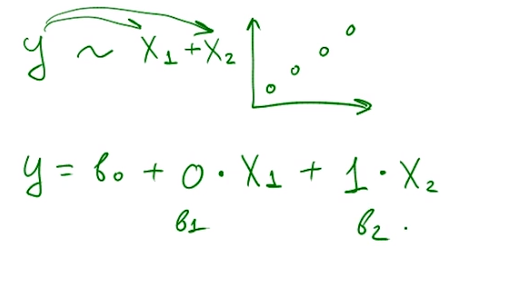  
2) Неполная мультиколлинеарность - если есть 2 предиктора с сильной линейной зависимостью(корреляция стремится к 1 или -1). Использование в модели 2 предикторов с сильной корреляцией может усложнить интерпретацию результатов.   
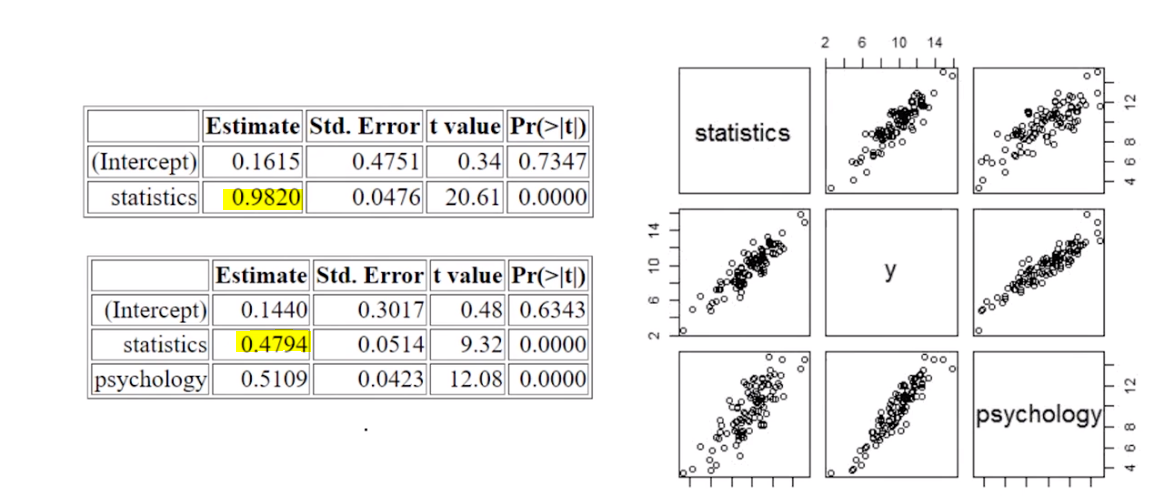  

Учет новых переменных позволяет по новому рассмотреть взаимосвязи:  
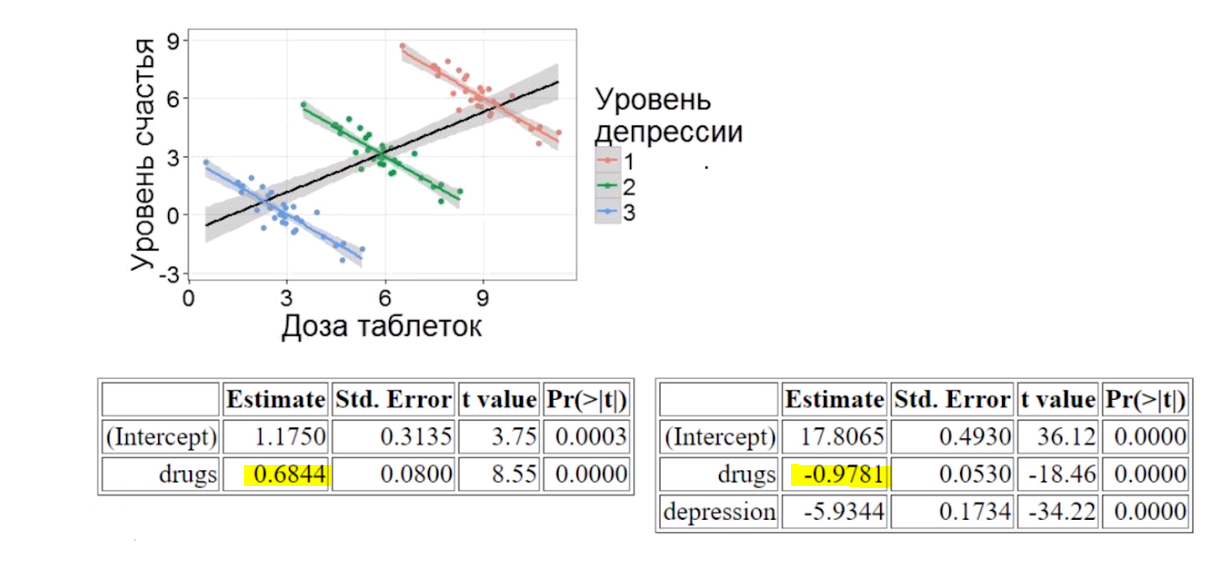  
intercept - уровень счастья,  
drugs - прием антидепрессантов,  
depression - как человек оценивает свой уровень счастья.  
Человек принимающий антидепрессанты уже имеет низкий уровень счастья(чем меньше уровень депрессии, тем меньше человек принимает антидепрессантов), поэтому при вводе переменной depression коэффициент drugs меняется по знаку на противоположный.  

### Примеры:  

In [24]:
library(dplyr)
set.seed(42)

x1 = rnorm(30)
x3 = rnorm(30)

d <- data.frame(y = rnorm(30),
                x_1 = x1,
                x_2 = x1,
                x_3 = x3)
head(d)

,y,x_1,x_2,x_3
,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.3672346,1.3709584,1.3709584,0.4554501
2,0.1852306,-0.5646982,-0.5646982,0.7048373
3,0.5818237,0.3631284,0.3631284,1.0351035
4,1.3997368,0.6328626,0.6328626,-0.6089264
5,-0.7272921,0.4042683,0.4042683,0.5049551
6,1.3025426,-0.1061245,-0.1061245,-1.7170087


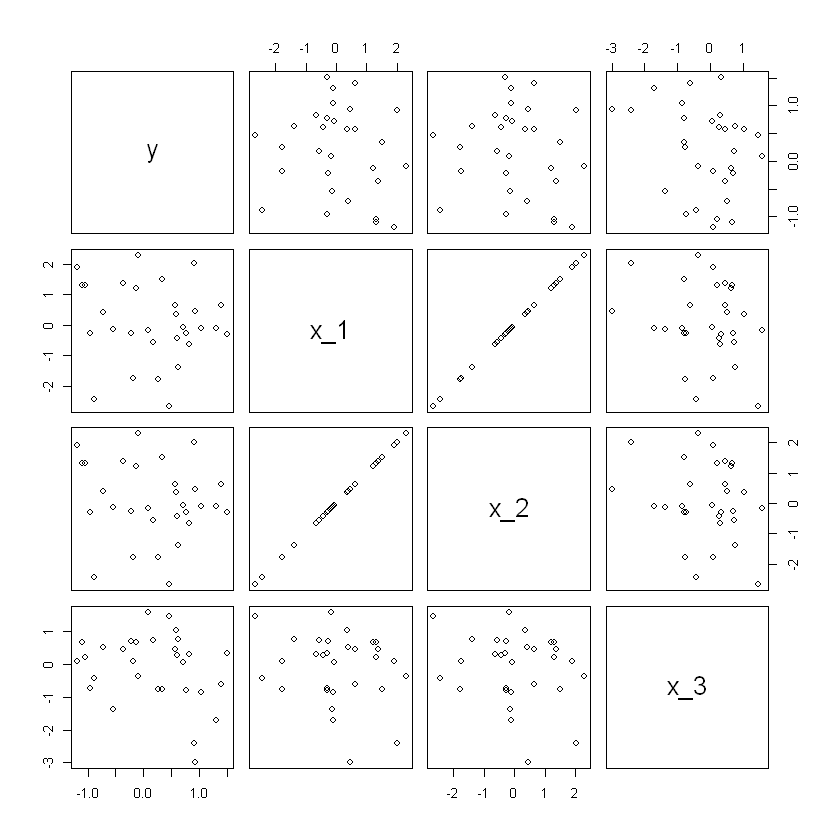

In [25]:
pairs(d)
# из графика видно, что переменные x_1 и x_2 имеют полную мультиколлинеарность

In [26]:
# Построение модели с полной мультиколлинеарностью в данных
fit <- lm(y ~ ., d)
summary(fit)
# в таком случае при построении модели у переменной x_2 будут отсутствовать коэффициенты


Call:
lm(formula = y ~ ., data = d)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.4559 -0.4919  0.1632  0.5268  1.3745 

Coefficients: (1 not defined because of singularities)
            Estimate Std. Error t value Pr(>|t|)
(Intercept)   0.1721     0.1413   1.218    0.234
x_1          -0.1237     0.1161  -1.065    0.296
x_2               NA         NA      NA       NA
x_3          -0.2230     0.1388  -1.607    0.120

Residual standard error: 0.7682 on 27 degrees of freedom
Multiple R-squared:  0.1045,	Adjusted R-squared:  0.03814 
F-statistic: 1.575 on 2 and 27 DF,  p-value: 0.2254


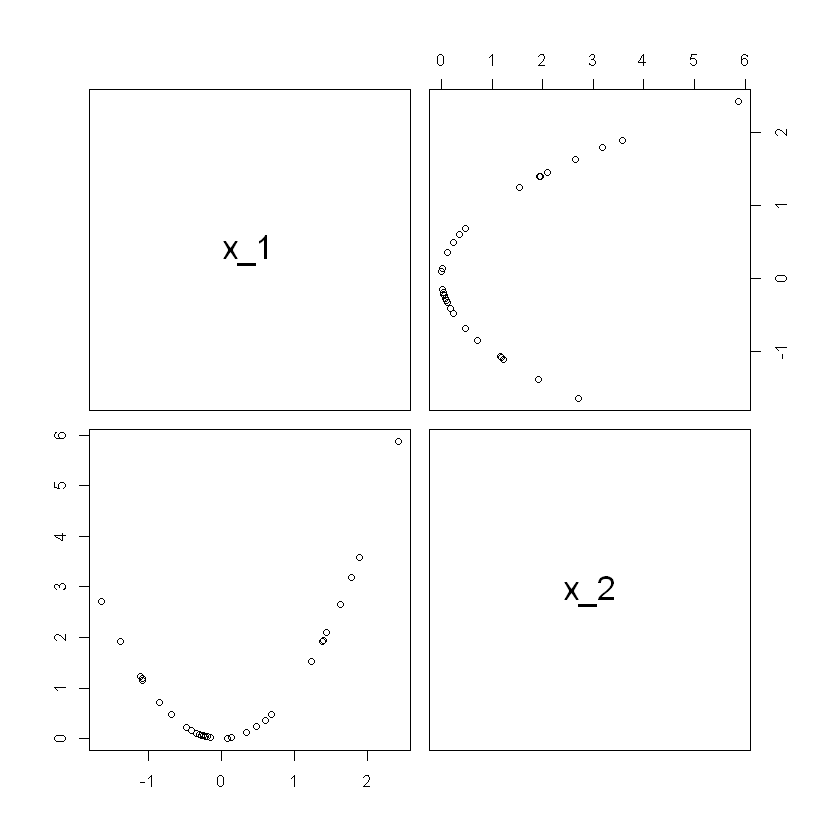

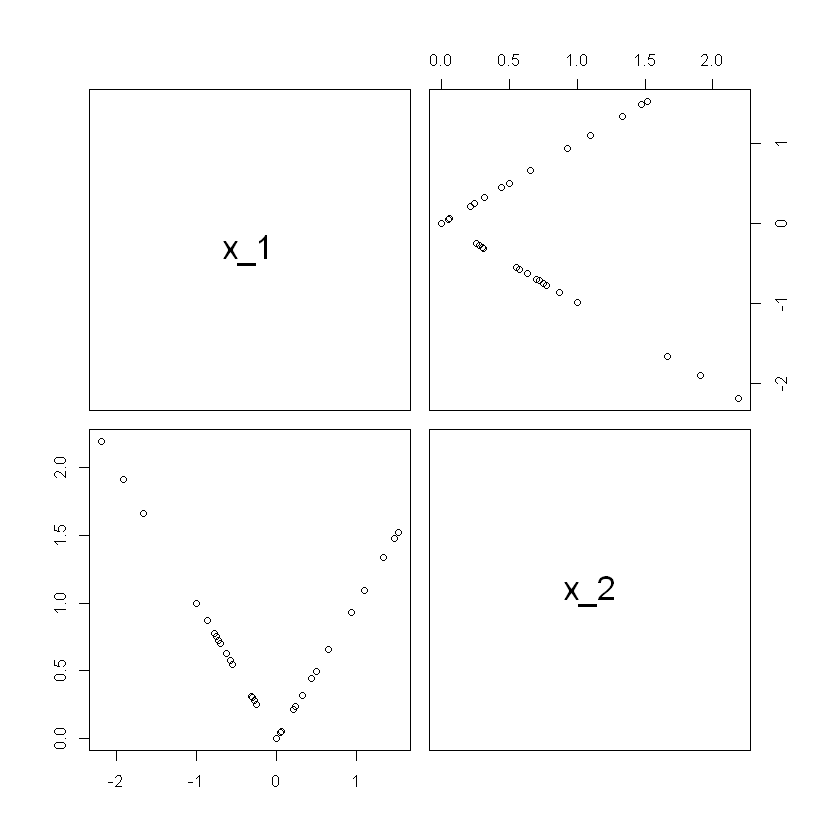

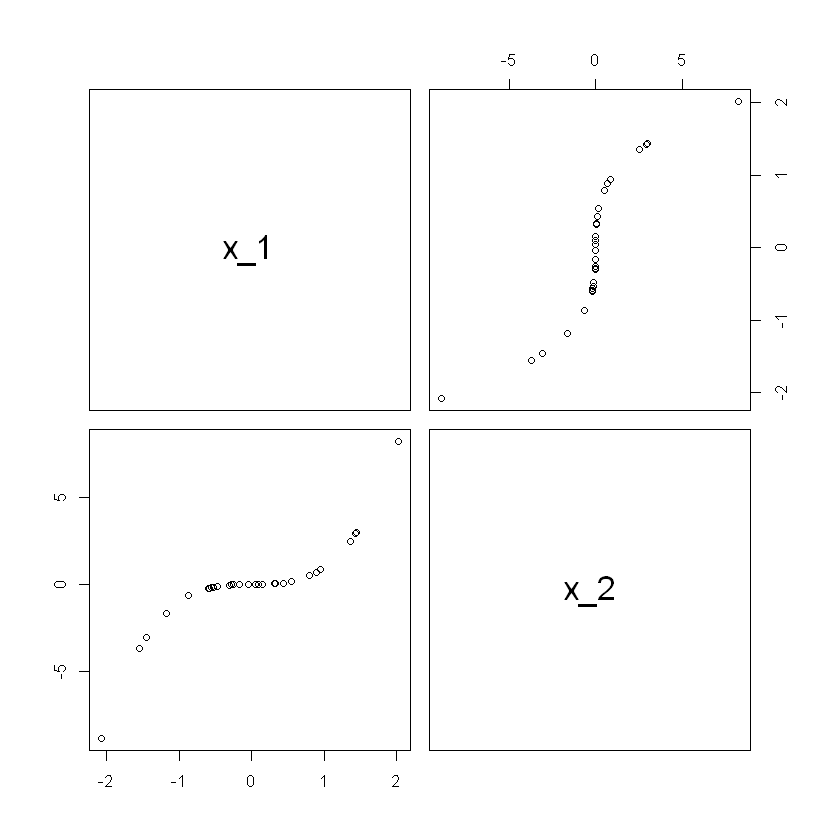

In [35]:
# Укажите верные высказывания:  
# Если между некоторыми независимыми переменными есть корреляция равная единице, 
# то мы не сможем однозначно рассчитать все коэффициенты наклона для независимых переменных. - Верно

# Если среди независимых переменных есть предиктор X и X в квадрате, 
# это означает, что мы имеем дело с полной мультиколлинеарностью. - Неверно

x1 = rnorm(30)

x <- data.frame(x_1 = x1,
                x_2 = x1^2)

pairs(x)

# Если среди независимых переменных есть предиктор X и модуль X, 
# это всегда означает, что мы имеем дело с полной мультиколлинеарностью. - Неверно

x1 = rnorm(30)

x <- data.frame(x_1 = x1,
                x_2 = abs(x1))

pairs(x)

# Если среди независимых переменных есть предиктор X и X в кубе, 
# это означает, что мы имеем дело с полной мультиколлинеарностью. - Неверно
x1 = rnorm(30)

x <- data.frame(x_1 = x1,
                x_2 = x1^3)

pairs(x)

## 1.7 Мультиколлинеарность. Часть 2<a id='1.7'></a>

### Основные понятия и тезисы:   
Наличие мультиколлинеарности в данных может привести к тому, что коэффициенты переменных будут рассчитаны неверно. Это не повлияет на предсказания модели, но даст ложную интерпретацию о взаимосвязи переменных.  

Проверка на мультиколлинеарность:  
1) Корреляционная матрица,  
2) Variance inflation factor (VIF) - определить насколько предиктор хорошо он объясняется другими предикоторами.  
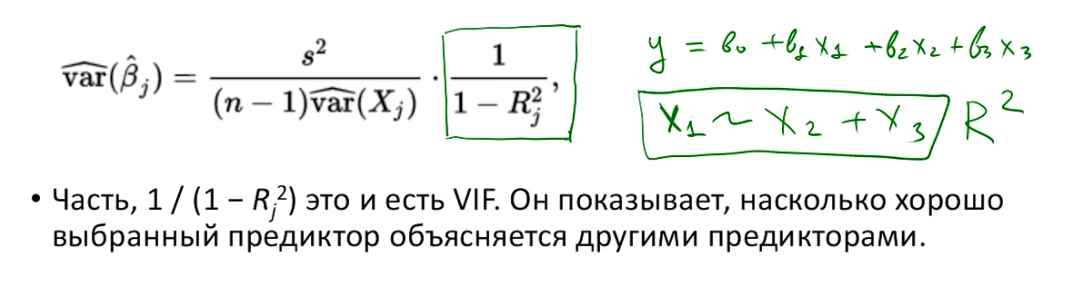  
Если R^2 близок к 1, то значит, что между предиктором и другими предикторами есть сильная линейная зависимость.  
Корень VIF показывает, во сколько раз стала больше стандартная ошибка данного коэффициента, по сравнение с ситуацией, если бы данный предиктор бы бы абсолютно независим от других предикторов. Если при некотором предикторе VIF = 5.27, значит, что стандартная ошибка этого коэффициента в sqrt(5.27) = 2.3 раза больше.  
Считается, если VIF > 10, то предиктор стоит исключить из модели.  


### Примеры:


Call:
lm(formula = dist ~ speed, data = cars)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.069  -9.525  -2.272   9.215  43.201 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -17.5791     6.7584  -2.601   0.0123 *  
speed         3.9324     0.4155   9.464 1.49e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 15.38 on 48 degrees of freedom
Multiple R-squared:  0.6511,	Adjusted R-squared:  0.6438 
F-statistic: 89.57 on 1 and 48 DF,  p-value: 1.49e-12


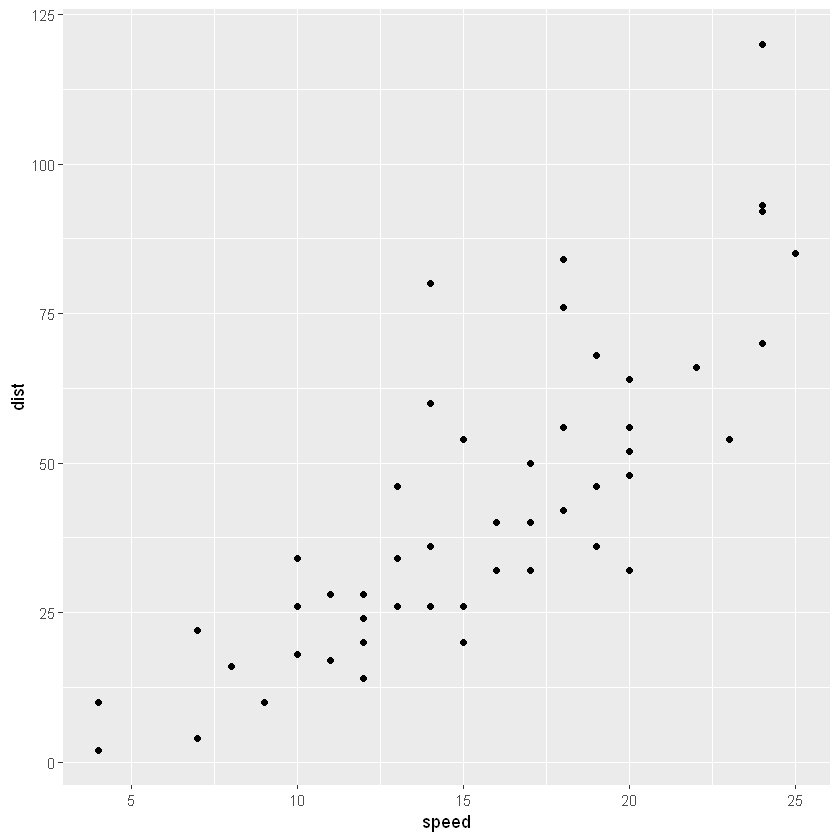

In [42]:
data(cars)

ggplot(data = cars, aes(x = speed, y = dist)) +
  geom_point()

fit1 <- lm(dist ~ speed, cars)
summary(fit1)

# p < 0.05 - коэффициент speed статистически значим - существует взаимосвязь между speed и dist
# R = 0.64 - статистически значим


Call:
lm(formula = dist ~ ., data = cars)

Residuals:
    Min      1Q  Median      3Q     Max 
-26.670  -9.601  -2.231   7.075  44.691 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept) -19.50505   28.40530  -0.687    0.496
speed         6.80111    6.80113   1.000    0.323
speed_2      -0.34966    0.49988  -0.699    0.488
speed_3       0.01025    0.01130   0.907    0.369

Residual standard error: 15.2 on 46 degrees of freedom
Multiple R-squared:  0.6732,	Adjusted R-squared:  0.6519 
F-statistic: 31.58 on 3 and 46 DF,  p-value: 3.074e-11


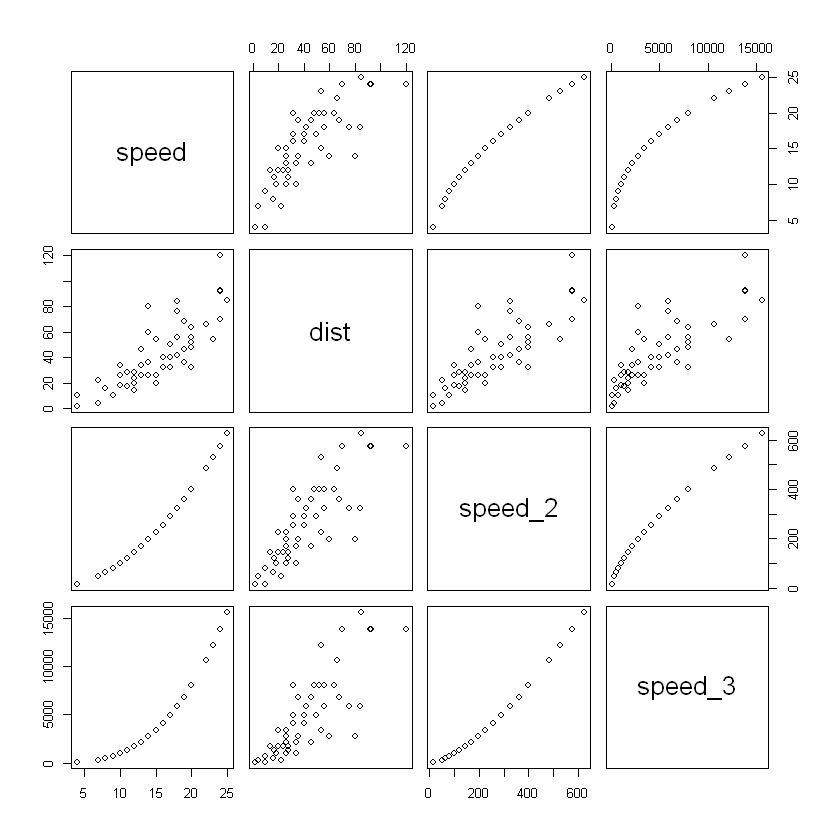

In [45]:
# добавление модифицированных предикторов
cars <-  mutate(cars, speed_2 = speed^2, speed_3 = speed^3)

pairs(cars)

fit_2 <- lm(dist ~., cars)
summary(fit_2)

# p > 0.05 - ни одна переменная статистически не значима
# R = 0.65 - статистически значим

In [1]:
library(dplyr)
# install.packages("car")
library(car) # VIF
# install.packages("DAAG")
# library(DAAG)


Присоединяю пакет: 'dplyr'


Следующие объекты скрыты от 'package:stats':

    filter, lag


Следующие объекты скрыты от 'package:base':

    intersect, setdiff, setequal, union


Загрузка требуемого пакета: carData


Присоединяю пакет: 'car'


Следующий объект скрыт от 'package:dplyr':

    recode




In [2]:
data(swiss)

fit_1  <- lm(Fertility ~ ., swiss)
summary(fit_1)

# Examination p > 0.05 - либо показатель статистически не значим, либо в данных есть мультиколлинеарность
# R^2 = 0.671


Call:
lm(formula = Fertility ~ ., data = swiss)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.2743  -5.2617   0.5032   4.1198  15.3213 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      66.91518   10.70604   6.250 1.91e-07 ***
Agriculture      -0.17211    0.07030  -2.448  0.01873 *  
Examination      -0.25801    0.25388  -1.016  0.31546    
Education        -0.87094    0.18303  -4.758 2.43e-05 ***
Catholic          0.10412    0.03526   2.953  0.00519 ** 
Infant.Mortality  1.07705    0.38172   2.822  0.00734 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.165 on 41 degrees of freedom
Multiple R-squared:  0.7067,	Adjusted R-squared:  0.671 
F-statistic: 19.76 on 5 and 41 DF,  p-value: 5.594e-10


In [3]:
cor.test(~ Fertility + Examination, swiss)
# корреляция между Examination и ЗП - p < 0.05 - говорит о том, что показатель статистически значим


	Pearson's product-moment correlation

data:  Fertility and Examination
t = -5.6753, df = 45, p-value = 9.45e-07
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.7870674 -0.4403995
sample estimates:
       cor 
-0.6458827 


In [4]:
# Рассчет VIF
vif(fit_1)
# Examination = 3.6754 - показатель хорошо объясняется другими переменными, значит его можно исключить

Agriculture      Examination        Education         Catholic 
        2.284129         3.675420         2.774943         1.937160 
Infant.Mortality 
        1.107542

In [5]:
fit_2 <- lm(Fertility ~ ., select(swiss, - Examination))
summary(fit_2)
# Остались только значимые предикторы
# R^2 = 0.6707


Call:
lm(formula = Fertility ~ ., data = select(swiss, -Examination))

Residuals:
     Min       1Q   Median       3Q      Max 
-14.6765  -6.0522   0.7514   3.1664  16.1422 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      62.10131    9.60489   6.466 8.49e-08 ***
Agriculture      -0.15462    0.06819  -2.267  0.02857 *  
Education        -0.98026    0.14814  -6.617 5.14e-08 ***
Catholic          0.12467    0.02889   4.315 9.50e-05 ***
Infant.Mortality  1.07844    0.38187   2.824  0.00722 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.168 on 42 degrees of freedom
Multiple R-squared:  0.6993,	Adjusted R-squared:  0.6707 
F-statistic: 24.42 on 4 and 42 DF,  p-value: 1.717e-10


In [6]:
vif(fit_2)

Agriculture        Education         Catholic Infant.Mortality 
        2.147153         1.816361         1.299916         1.107528

In [7]:
### VIF на python
# from statsmodels.stats.outliers_influence import variance_inflation_factor
#import pandas as pd

#vif = pd.DataFrame()
v#if["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
#vif["features"] = X.columns

ERROR: Error in parse(text = x, srcfile = src): <text>:6:21: неожиданный '['
5: #vif = pd.DataFrame()
6: vif["VIF Factor"] = [
                       ^


## 1.8 Практические задания<a id='1.8'></a>